# Stats and Public Health II

---

## Introduction 

The **West Nile Virus (WNV)** is a viral illness largely spread by mosquitoes and can be transmitted to a person when an infected mosquito bites them. WNV was first detected in Eastern American States in 1999 and by 2002, the city of Chicago reported 225 cases and 22 deaths as a result of the virus, with numbers of fatalaties peaking in 2005.

This epidemic prompted the city of Chicago to study the features of this virus by tracking the number of mosquito populations and WNV prevalence using a series of traps that they place around the city. The data was collected over 12 years from 2008 - 2019 and it includes information about the traps placed around the city, the number and types of mosquitoes each one caught, as well as whether WNV was detected in those mosquitoes. This report aims to analyze the dataset and get a mathematical understanding of how the variables are interconnected using statistical analytical models.

### Set up

We will start off by importing some libraries we'll be using in this analysis such as Pandas, Numpy, and Seaborn. Next, load the dataset into the notebook script by pasting the dataset's file path as seen below.

In [42]:
# Import relevant packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from scipy.stats import norm
from scipy.stats import pearsonr

# Load the dataset

file_path = "Desktop/data/mosquito_data_part_2.csv"
mosquito_df = pd.read_csv(file_path)


### A First Look at the Data

Now that the dataset has been loaded, let's examine our table by displaying the first and last few rows of the dataset as well as some information of its columns.

In [43]:
# View the first rows of the table

display(mosquito_df.head(),mosquito_df.tail(), mosquito_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             18495 non-null  int64  
 1   Week             18495 non-null  int64  
 2   Address Block    18495 non-null  object 
 3   Trap             18495 non-null  object 
 4   Trap type        18495 non-null  object 
 5   Date             18495 non-null  object 
 6   Mosquito number  18495 non-null  int64  
 7   WNV Present      18495 non-null  object 
 8   Species          18495 non-null  object 
 9   Lat              18495 non-null  float64
 10  Lon              18495 non-null  float64
 11  Month            18495 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 1.7+ MB


,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month
0,2019,39,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.977738,-87.880969,9
1,2019,39,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.798211,-87.736925,9
2,2019,39,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.987245,-87.689417,9
3,2019,39,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.953664,-87.724987,9
4,2019,39,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,9,negative,CULEX RESTUANS,41.657069,-87.546049,9


,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month
18490,2016,36,3XX W 18TH ST,T043,GRAVID,2016-09-09 00:09:00,4,positive,CULEX PIPIENS,41.857843,-87.635858,9
18491,2007,34,46XX N MILWAUKEE AVE,T003,GRAVID,2007-08-24 00:08:00,19,positive,CULEX PIPIENS,41.965376,-87.758403,8
18492,2016,30,127XX S DOTY AVE,T115,GRAVID,2016-07-27 00:07:00,34,positive,CULEX RESTUANS,41.662395,-87.590176,7
18493,2017,33,20XX N DOMINICK ST,T240B,SENTINEL,2017-08-17 00:08:00,50,positive,CULEX RESTUANS,41.919197,-87.664758,8
18494,2015,33,100XX W OHARE AIRPORT,T902,GRAVID,2015-08-20 00:08:00,6,positive,CULEX RESTUANS,41.977738,-87.880969,8


None

*Imporant Observations:*

- *The table consists of $12$ columns and over $18,000$ rows.*  
- *The data types of the columns consist of objects, integers, and floats as summarized below in the Data*

### Data Dictionary

**Variables:**   

1. `Year:` The year of observation | `int`
2. `Week:` The week of observation  | `int`
3. `Address :` Location address of the trap | `object` 
4. `Trap:` Trap identifier | `object`    
5. `Trap Type:` Type of trap used | `object`    
6. `Date:` Date of the observation | `object`     
7. `Mosquito Number:` Number of mosquitoes caught | `int`    
8. `Species:` species of mosquito caught | `object`   
9. `Lat:` Latitude of the trap location | `float`    
10. `Lon:` Longitude of the trap location | `float`      
11. `Month:` The month of observation | `int`  

**Target:**   
12. `WNV Present:` Whether West Nile Virus was present | `object`    


---

## 1. Basic Analysis

### 1.1 Changing some categorical columns into binary columns

We will start by performing some basic analysis on the data set. But before that, let's make some formatting changes to the table. The goal is to turn the categrical columns we have into binary columns to be able to perform some statistical analysis on them later on. The columns we will be converting are the dependent variable `WNV Present`, and the indepedent variables `Trap type` and `Species`. We will do this by creating three separate dummy tables and then merging them with the original dataset table. Note that I will keep the original dataset `mosquito_df` as well as the newly merged table which I've called `merged` as I will be using both thorighout the report. 

In [44]:
# Step 1: Create dummy variables for 'WNV Present' and 'Trap Type' and display first rows of both tables

dummy1 = pd.get_dummies(mosquito_df["WNV Present"])
dummy2 = pd.get_dummies(mosquito_df["Trap type"])
dummy3 = pd.get_dummies(mosquito_df["Species"])
display(dummy1.head(), dummy2.head(),dummy3.head())

,negative,positive
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False


,CDC,GRAVID,OVI,SENTINEL
0,False,True,False,False
1,False,True,False,False
2,False,True,False,False
3,False,True,False,False
4,False,True,False,False


,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS
0,False,True,False,False
1,False,True,False,False
2,False,True,False,False
3,False,True,False,False
4,False,True,False,False


In [45]:
# Step 2: Concat the three dummy tables with original table to make a new table called 'merged'

merged = pd.concat([mosquito_df, dummy1,dummy2,dummy3], axis='columns')

# Sanity Check
merged.head()

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,...,negative,positive,CDC,GRAVID,OVI,SENTINEL,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS
0,2019,39,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.977738,...,True,False,False,True,False,False,False,True,False,False
1,2019,39,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.798211,...,True,False,False,True,False,False,False,True,False,False
2,2019,39,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.987245,...,True,False,False,True,False,False,False,True,False,False
3,2019,39,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.953664,...,True,False,False,True,False,False,False,True,False,False
4,2019,39,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,9,negative,CULEX RESTUANS,41.657069,...,True,False,False,True,False,False,False,True,False,False


In [46]:
# Step 3: Drop original columns from the newly created table 

merged.drop(columns='Trap type', inplace=True)
merged.drop(columns = "WNV Present", inplace = True)
merged.drop(columns = 'negative', inplace = True)
merged.drop(columns = 'Species', inplace = True)

# Sanity Check"
merged.head()

,Year,Week,Address Block,Trap,Date,Mosquito number,Lat,Lon,Month,positive,CDC,GRAVID,OVI,SENTINEL,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS
0,2019,39,100XX W OHARE AIRPORT,T910,2019-09-26 00:09:00,2,41.977738,-87.880969,9,False,False,True,False,False,False,True,False,False
1,2019,39,52XX S KOLMAR AVE,T114,2019-09-26 00:09:00,1,41.798211,-87.736925,9,False,False,True,False,False,False,True,False,False
2,2019,39,58XX N WESTERN AVE,T028,2019-09-26 00:09:00,2,41.987245,-87.689417,9,False,False,True,False,False,False,True,False,False
3,2019,39,39XX N SPRINGFIELD AVE,T228,2019-09-26 00:09:00,1,41.953664,-87.724987,9,False,False,True,False,False,False,True,False,False
4,2019,39,131XX S BRANDON AVE,T209,2019-09-26 00:09:00,9,41.657069,-87.546049,9,False,False,True,False,False,False,True,False,False


In [60]:
# Step 4: Convert 'WNV Present' into binary and rename 'positive' column to 'WNV Present' then display head

merged = merged.replace({True: 1, False: 0})
merged.rename(columns = {"positive": "WNV Present"}, inplace =True)

#Sanity Check
merged.head()

,Year,Week,Address Block,Trap,Date,Mosquito number,Lat,Lon,Month,WNV Present,CDC,GRAVID,OVI,SENTINEL,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS
0,2019,39,100XX W OHARE AIRPORT,T910,2019-09-26 00:09:00,2,41.977738,-87.880969,9,0,0,1,0,0,0,1,0,0
1,2019,39,52XX S KOLMAR AVE,T114,2019-09-26 00:09:00,1,41.798211,-87.736925,9,0,0,1,0,0,0,1,0,0
2,2019,39,58XX N WESTERN AVE,T028,2019-09-26 00:09:00,2,41.987245,-87.689417,9,0,0,1,0,0,0,1,0,0
3,2019,39,39XX N SPRINGFIELD AVE,T228,2019-09-26 00:09:00,1,41.953664,-87.724987,9,0,0,1,0,0,0,1,0,0
4,2019,39,131XX S BRANDON AVE,T209,2019-09-26 00:09:00,9,41.657069,-87.546049,9,0,0,1,0,0,0,1,0,0


In [61]:
# Step 5: display our newly merged table into the original table

#mosquito_df = merged
display(mosquito_df.head(),merged.head())

,Year,Week,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon,Month
0,2019,39,100XX W OHARE AIRPORT,T910,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.977738,-87.880969,9
1,2019,39,52XX S KOLMAR AVE,T114,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.798211,-87.736925,9
2,2019,39,58XX N WESTERN AVE,T028,GRAVID,2019-09-26 00:09:00,2,negative,CULEX RESTUANS,41.987245,-87.689417,9
3,2019,39,39XX N SPRINGFIELD AVE,T228,GRAVID,2019-09-26 00:09:00,1,negative,CULEX RESTUANS,41.953664,-87.724987,9
4,2019,39,131XX S BRANDON AVE,T209,GRAVID,2019-09-26 00:09:00,9,negative,CULEX RESTUANS,41.657069,-87.546049,9


,Year,Week,Address Block,Trap,Date,Mosquito number,Lat,Lon,Month,WNV Present,CDC,GRAVID,OVI,SENTINEL,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS
0,2019,39,100XX W OHARE AIRPORT,T910,2019-09-26 00:09:00,2,41.977738,-87.880969,9,0,0,1,0,0,0,1,0,0
1,2019,39,52XX S KOLMAR AVE,T114,2019-09-26 00:09:00,1,41.798211,-87.736925,9,0,0,1,0,0,0,1,0,0
2,2019,39,58XX N WESTERN AVE,T028,2019-09-26 00:09:00,2,41.987245,-87.689417,9,0,0,1,0,0,0,1,0,0
3,2019,39,39XX N SPRINGFIELD AVE,T228,2019-09-26 00:09:00,1,41.953664,-87.724987,9,0,0,1,0,0,0,1,0,0
4,2019,39,131XX S BRANDON AVE,T209,2019-09-26 00:09:00,9,41.657069,-87.546049,9,0,0,1,0,0,0,1,0,0


As we can see above, the newly merged table has been successfully created with the categorical columns turning into binary columns. Now we can proceed with some basic analysis.

### 1.2 Monthly Average Number of Mosquitoes Caught

A good place to start this analysis is by examining the trends of the number of mosquitoes caught and how they vary from month to month. This aims to provide insights of the performance of our traps and whether there are any seasonal trends in the number of mosquitoes our traps were able to catch. The steps to do this is provided below:

In [62]:
# Step 1: Find the average number of mosquitoes and group by month
monthly_avg_mosq = mosquito_df.groupby(['Month'])['Mosquito number'].mean().reset_index()


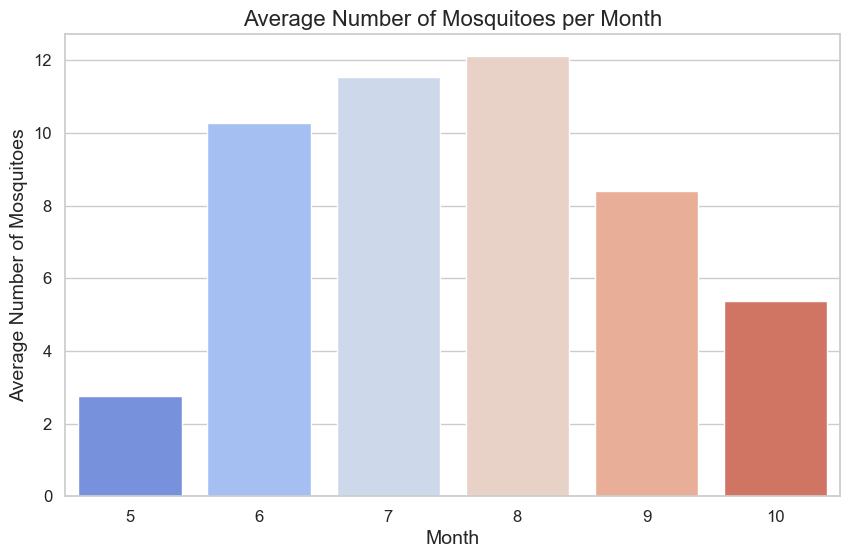

In [63]:
# Step 2: Plot the bar graph with months on the x-axis and number of mosquitoes on the y-axis

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Mosquito number', data=monthly_avg_mosq, palette='coolwarm')
plt.title('Average Number of Mosquitoes per Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Number of Mosquitoes', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

The plot above reveals a clear seasonal trend between the number of mosquitoes caught; the number of mosquitoes begins to increase in June, peaking in August, which shows the highest average mosquito count followed by avisible deccline through September and October. 

This pattern aligns with typical seasonal and environmental factors known to affect mosquito populations, where warmer offer ideal conditions for mosquitos to live as opposed to cooler months, leading to higher counts in the summer. We cannow dive further into examining the occurence of WNV and the various variables that can affect it.

---

## 2. Statistical Analysis

### 2.1 Testing the statistical significance between the mosquito species and the occurence of WNV

Let's test whether there is a relationship between the species of a mosquito and the occurence of WNV. Our hypothesis for this statistical analysis are the following:

**Null Hypothesis:** There's no corrolation between mosquito species and the occurence of WNV.

**Alternative Hypothesis:** There is corrolation between mosquito species and the occurence of WNV.

Since we are dealing with categorical data, the Chi-Squared Test of Independence would the best tool in this case to conduct a hypothesis test and find out whether there is a statistical significance between the different mosquito types and the occurence of WNV. The steps to perform this test can be seen belowL


In [64]:
# Step 1: Create a DataFrame to show the number of mosquitoes with and without WNV

species_count = pd.DataFrame(mosquito_df.groupby(['Species', 'WNV Present']).size().unstack(fill_value = 0))
display(species_count)

WNV Present,negative,positive
Species,,
CULEX PIPIENS,4074,1412
CULEX RESTUANS,9309,2557
CULEX SALINARIUS,215,11
CULEX TERRITANS,903,14


<Figure size 1000x600 with 0 Axes>

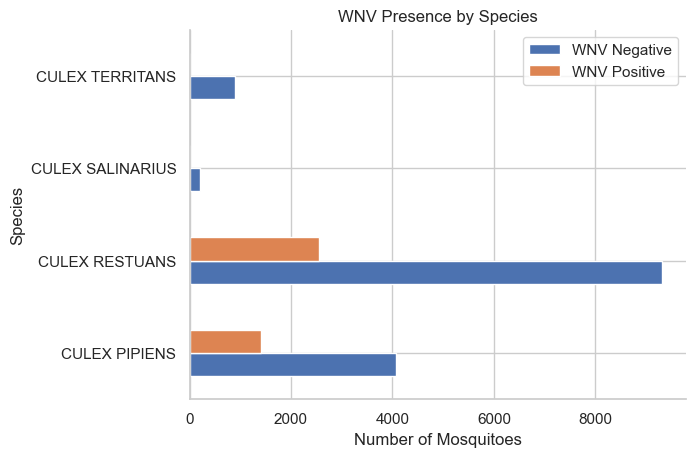

In [65]:
# Step 2: Visualize the dataset above in a bar chart with various species on the y-axis and 
# the number of mosquitoes caught on the x-axis. The different colors indicate the presence of WNV in that group.

plt.figure(figsize=(10,6))


species_count.plot(kind='barh')
plt.title('WNV Presence by Species')
plt.xlabel('Number of Mosquitoes')
plt.legend(['WNV Negative','WNV Positive'])
plt.ylabel('Species')
#plt.xticks(monthly_avg_mosq['Year'])
plt.grid(True)
sns.despine()
plt.show()

In [66]:
# Step 3: Conduct the Chi- test

chi_test = stats.chi2_contingency(species_count)
print(f"The Chi2ContingencyResult is:\n\n Statistic = {chi_test.statistic}\n P-Value = {chi_test.pvalue}\n Degrees of Freedom = {chi_test.dof} \n Expected Frequency =\n\n {chi_test.expected_freq}")

The Chi2ContingencyResult is:

 Statistic = 311.10394683130164
 P-Value = 3.9302341764409087e-67
 Degrees of Freedom = 3 
 Expected Frequency =

 [[4301.29689105 1184.70310895]
 [9303.5342525  2562.4657475 ]
 [ 177.19524196   48.80475804]
 [ 718.97361449  198.02638551]]


#### Analyzing the Chi-Test results

Given by the very low pvalue $p \approx 3.93$ suggest that there is a very significant association between mosquito species and the presence of WNV. In other words, the occurence of the virus is not uniformly distributed accross the different species with some species like showing a higher chance of contracting the virus as opposed to others. 

### 2.2 Computing Variable Correlation

Next, we will find the columns are positively correlated with the number of mosquietoes caught as well as the columns that are negatively correlated with the number of mosquitoes caught.

In [67]:
# Pull out X and y
X = merged.drop(['Mosquito number','Address Block','Trap','Date'], axis=1)
y = merged['Mosquito number'].copy()
X

,Year,Week,Lat,Lon,Month,WNV Present,CDC,GRAVID,OVI,SENTINEL,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS
0,2019,39,41.977738,-87.880969,9,0,0,1,0,0,0,1,0,0
1,2019,39,41.798211,-87.736925,9,0,0,1,0,0,0,1,0,0
2,2019,39,41.987245,-87.689417,9,0,0,1,0,0,0,1,0,0
3,2019,39,41.953664,-87.724987,9,0,0,1,0,0,0,1,0,0
4,2019,39,41.657069,-87.546049,9,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18490,2016,36,41.857843,-87.635858,9,1,0,1,0,0,1,0,0,0
18491,2007,34,41.965376,-87.758403,8,1,0,1,0,0,1,0,0,0
18492,2016,30,41.662395,-87.590176,7,1,0,1,0,0,0,1,0,0
18493,2017,33,41.919197,-87.664758,8,1,0,0,0,1,0,1,0,0


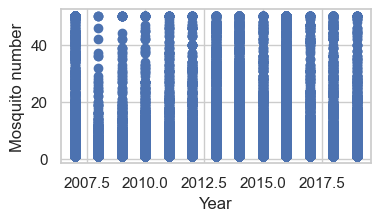

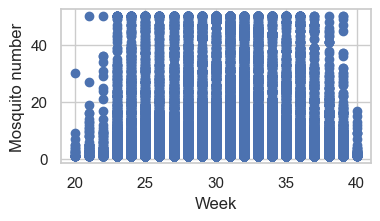

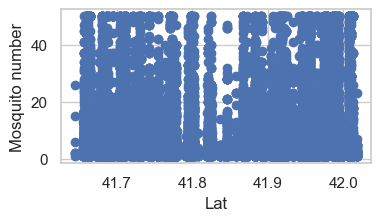

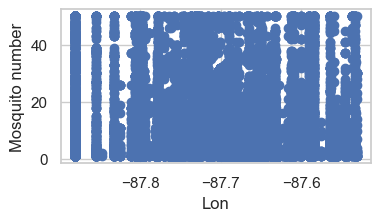

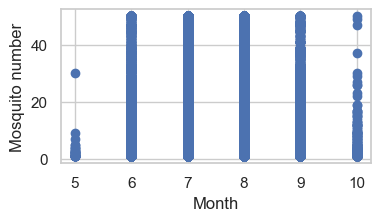

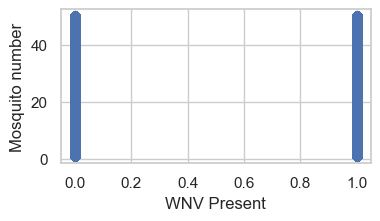

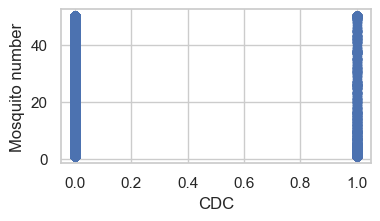

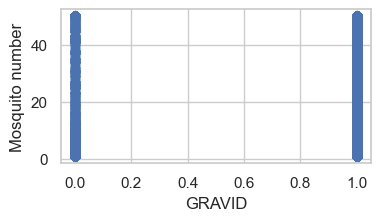

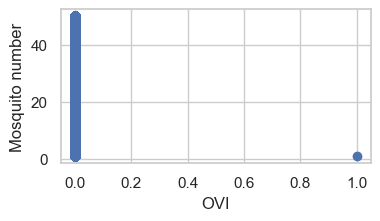

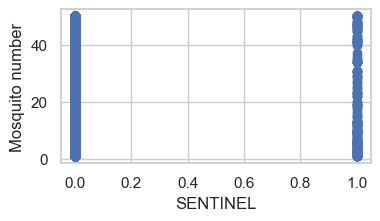

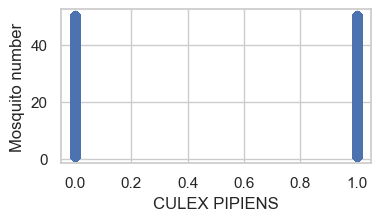

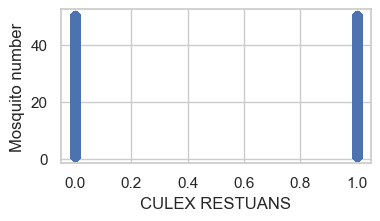

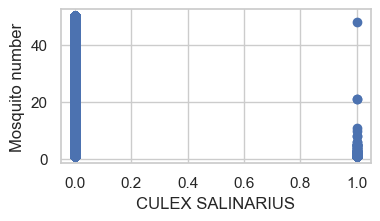

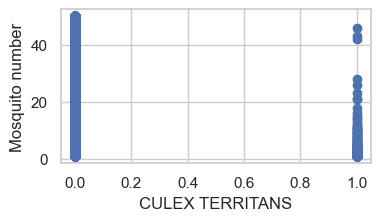

In [68]:
for col in X.columns: 
    plt.figure(figsize=(4,2))
    plt.scatter(X[col], y)
    plt.ylabel('Mosquito number')
    plt.xlabel(col)
    plt.show()

In [80]:
# Assumptions - Calculate correlations between our independent variables. 
corr_df = X.corr()

# Add a mask
mask = np.triu(corr_df)

# Visualize
plt.figure(figsize=(15,15))
sns.heatmap(corr_df.round(2), annot=True, vmax=1, vmin=-1, cmap='coolwarm', mask=mask)
plt.show()


ValueError: could not convert string to float: '2019-09-26 00:09:00'

In [70]:
X.describe()

,Year,Week,Lat,Lon,Month,WNV Present,CDC,GRAVID,OVI,SENTINEL,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS
count,18495.000000,18495.000000,18495.000000,18495.000000,18495.000000,18495.000000,18495.000000,18495.000000,18495.000000,18495.000000,18495.000000,18495.000000,18495.000000,18495.000000
mean,2012.905812,31.004001,41.852599,-87.712611,7.627088,0.215950,0.029413,0.959232,0.000054,0.011300,0.296621,0.641579,0.012220,0.049581
std,3.725857,4.332020,0.115419,0.095409,0.998079,0.411491,0.168967,0.197757,0.007353,0.105704,0.456780,0.479550,0.109867,0.217083
min,2007.000000,20.000000,41.644720,-87.880969,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2010.000000,28.000000,41.754148,-87.778235,7.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2013.000000,31.000000,41.872873,-87.703105,8.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,2016.000000,34.000000,41.970102,-87.643076,8.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,2019.000000,40.000000,42.017801,-87.531051,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


---

## 3. Advanced Statistical Analysis

### 3.1 Linear Regression Analysis

In [71]:
X = mosquito_df[['Year', 'Week', 'Lat', 'Lon', 'Month']]  # Independent variables
y = mosquito_df['Mosquito number']  # Dependent variable

X = sm.add_constant(X)  # Add a constant term for the intercept
model = sm.OLS(y, X).fit()  # Fit the linear regression model
print(model.summary())  # Print the summary statistics of the model

                            OLS Regression Results                            
Dep. Variable:        Mosquito number   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     146.5
Date:                Mon, 26 Feb 2024   Prob (F-statistic):          4.92e-153
Time:                        09:19:58   Log-Likelihood:                -73986.
No. Observations:               18495   AIC:                         1.480e+05
Df Residuals:                   18489   BIC:                         1.480e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2777.3672    112.169    -24.761      0.0

### 3.2 Logistic Regression Analysis

Now we will conduct a logistic regression analysis to determine how various independent variables affect West Nile Virus (WNV) presence, we will follow these steps:

The independent variables for this analysis are species, trap type, year and month and importantly, Mosquito number which are all numerical values (or converted into binary). The dependent variable is WNV Present (also connverted into to binary),

We will evaluate the model by examining the coefficients for each independent variable to understand their impact on WNV presence. We'll also assess model performance using metrics suitable for classification, such as accuracy, precision, recall, and the AUC score.



In [72]:
merged.head()

,Year,Week,Address Block,Trap,Date,Mosquito number,Lat,Lon,Month,WNV Present,CDC,GRAVID,OVI,SENTINEL,CULEX PIPIENS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TERRITANS
0,2019,39,100XX W OHARE AIRPORT,T910,2019-09-26 00:09:00,2,41.977738,-87.880969,9,0,0,1,0,0,0,1,0,0
1,2019,39,52XX S KOLMAR AVE,T114,2019-09-26 00:09:00,1,41.798211,-87.736925,9,0,0,1,0,0,0,1,0,0
2,2019,39,58XX N WESTERN AVE,T028,2019-09-26 00:09:00,2,41.987245,-87.689417,9,0,0,1,0,0,0,1,0,0
3,2019,39,39XX N SPRINGFIELD AVE,T228,2019-09-26 00:09:00,1,41.953664,-87.724987,9,0,0,1,0,0,0,1,0,0
4,2019,39,131XX S BRANDON AVE,T209,2019-09-26 00:09:00,9,41.657069,-87.546049,9,0,0,1,0,0,0,1,0,0


In [79]:
# Preparing the independent variables (with 'Mosquito number') and dependent variable
X_log = merged[['Year','Lat','Lon','Month','CDC','GRAVID','CULEX RESTUANS','CULEX SALINARIUS','CULEX TERRITANS']]
y_log = merged['WNV Present']

# Adding a constant to the independent variables for the intercept
X_log = sm.add_constant(X_log)

# Splitting your data into training and testing sets can be done using sklearn's train_test_split
# For simplicity, here's how you directly fit the model without splitting
logit_model = sm.Logit(y_log, X_log)
result = logit_model.fit()

# Displaying the summary of the model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.467548
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:            WNV Present   No. Observations:                18495
Model:                          Logit   Df Residuals:                    18485
Method:                           MLE   Df Model:                            9
Date:                Mon, 26 Feb 2024   Pseudo R-squ.:                  0.1039
Time:                        09:24:31   Log-Likelihood:                -8647.3
converged:                       True   LL-Null:                       -9649.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -660.8221     23.034    -28.689      0.000    -705.967    -615.677
Year       